In [1]:
import os, sys, glob
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from matplotlib import colors
import lightkurve as lk
import pickle

%matplotlib inline
path = os.path.dirname(os.getcwd()) 

sys.path.append(path)
from exba import EXBA

lk.__version__

'2.0.3.dev'

In [2]:
CH = np.arange(1, 85)
CH

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84])

In [3]:
models = {}
for ch in CH:
    try:
        fname = "%s/data/ffi/%i/channel_%i_psf_model.pkl" % (path, 5, ch)
        models[ch] = pickle.load(open(fname, "rb"))
    except FileNotFoundError:
        continue

In [4]:
models.keys()

dict_keys([1, 2, 3, 4, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84])

In [5]:
map2 = {2:4, 3:3, 4:8, 5:7, 6:12, 7:11,
        12:1, 13:2, 14:5, 15:6, 16:9, 17:10,
        20:15, 21:14, 22:20, 23:19, 24:24, 25:23, 26:25, 27:28, 28:29, 29:32,
        30:16, 31:13, 32:17, 33:18, 34:21, 35:22, 36:26, 37:27, 38:30, 39:31,
        40:35, 41:34, 42:39, 43:38, 44:43, 45:42, 46:45, 47:48, 48:49, 49:52,
        50:36, 51:33, 52:40, 53:37, 54:44, 55:41, 56:46, 57:47, 58:50, 59:51,
        60:55, 61:54, 62:59, 63:58, 64:62, 65:61, 66:66, 67:65, 68:69, 69:72,
        70:56, 71:53, 72:60, 73:57, 74:63, 75:64, 76:67, 77:68, 78:70, 79:71,
        82:74, 83:73, 84:78, 85:77, 86:82, 87:81,
        92:75, 93:76, 94:79, 95:80, 96:83, 97:84}

maprot = { 1:False,  2:'h',  3:'hv',  4:'v',  5:False,  6:'h',  7:'hv',  8:'v',  9:False, 10:'h', 
          11:'hv', 12:'v', 13:'h', 14:'hv', 15:'v', 16:False, 17:False, 18:'h', 19:'hv', 20:'v', 
          21:False, 22:'h', 23:'hv', 24:'v', 25:'v', 26:False, 27:'h', 28:'hv', 29:'v', 30:False, 
          31:'h', 32:'hv', 33:'h', 34:'hv', 35:'v', 36:False, 37:'h', 38:'hv', 39:'v', 40:False, 
          41:'h', 42:'hv', 43:'v', 44:False, 45:'v', 46:False, 47:'h', 48:'hv', 49:'v', 50:False, 
          51:'h', 52:'hv', 53:'h', 54:'hv', 55:'v', 56:False, 57:'h', 58:'hv', 59:'v', 60:False, 
          61:'hv', 62:'v', 63:False, 64:'h', 65:'hv', 66:'v', 67:False, 68:'h', 69:'v', 70:False, 
          71:'h', 72:'hv', 73:'hv', 74:'v', 75:False, 76:'h', 77:'hv', 78:'v', 79:False, 80:'h', 
          81:'hv', 82:'v', 83:False, 84:'h'}

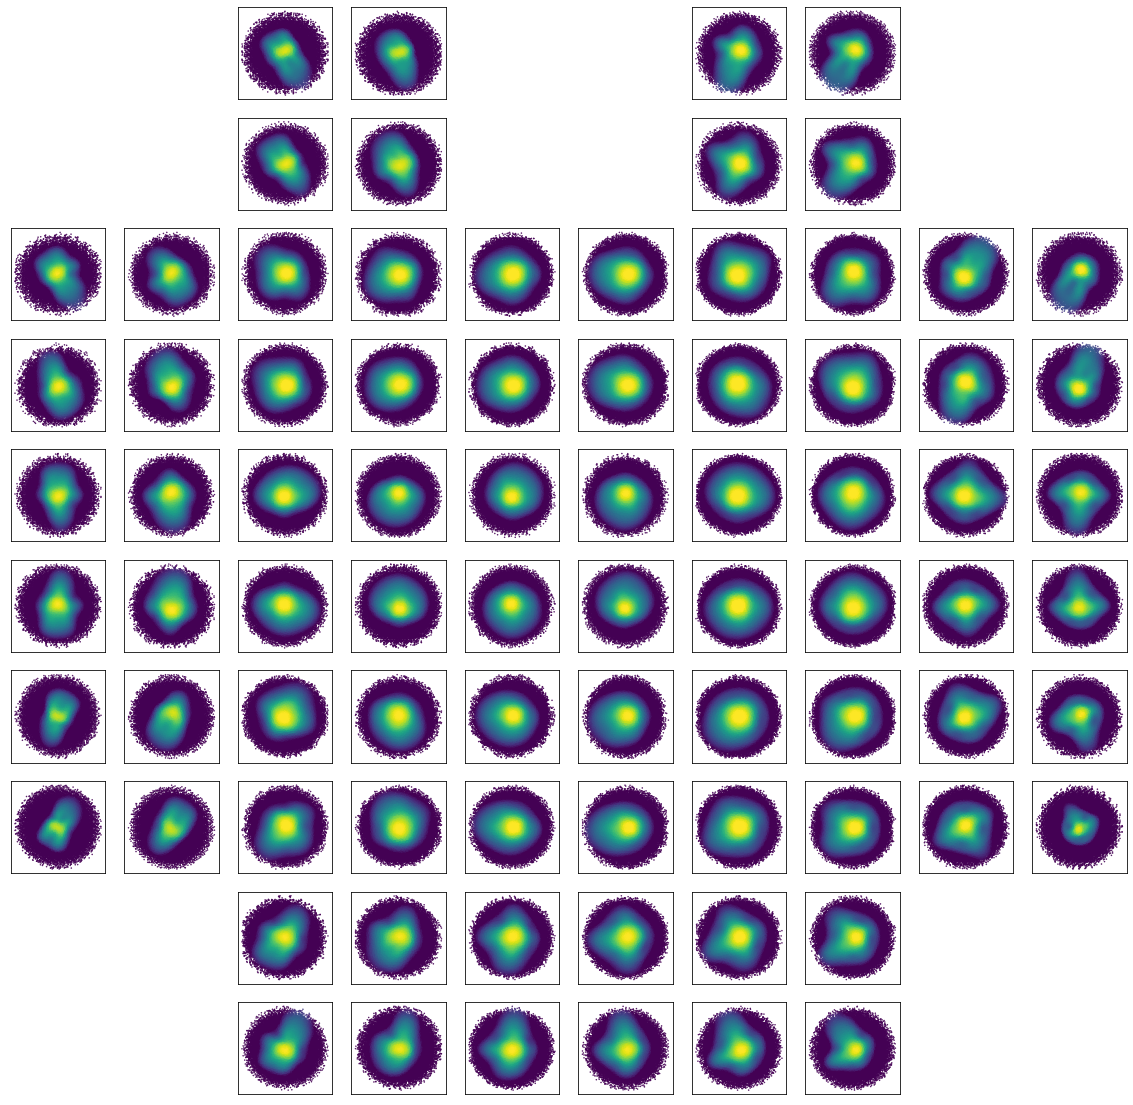

In [11]:
model = True

fig, axis = plt.subplots(5*2,5*2, sharex=False, sharey=False, figsize=(20, 20))

for i, ax in enumerate(axis.ravel()):
    if i not in map2.keys() or i in [4,5,14,15]:
        ax._visible = False
        continue
    if map2[i] not in models.keys():
        continue
        
    if model:
        x = models[map2[i]]["x_model"]
        y = models[map2[i]]["y_model"]
        f = models[map2[i]]["f_model"]
    else:
        x = models[map2[i]]["x_model"]
        y = models[map2[i]]["y_model"]
        f = models[map2[i]]["mean_f"]
        mask = models[map2[i]]["clip_mask"]
        x = x[mask]
        y = y[mask]
        f = f[mask]
    # ax.text(x.min() + 0.5, y.min() + 0.5, map2[i], color="r", fontsize=15)

    ax.scatter(x, y, c=f, marker=".", s=1, vmin=-3, vmax=-0.5)
    
    if maprot[map2[i]] == 'h':
        ax.invert_xaxis()
        
    if maprot[map2[i]] == 'hv':
        ax.invert_xaxis()
        ax.invert_yaxis()
        
    if maprot[map2[i]] == 'v':
        ax.invert_yaxis()

    
for ax in axis.ravel():
    ax.set_yticks([])
    ax.set_xticks([])
    ax.set_facecolor('none')
    
plt.savefig("../figures/ffi/focal_plane_psf_model.png", format="png", bbox_inches="tight")

plt.show()

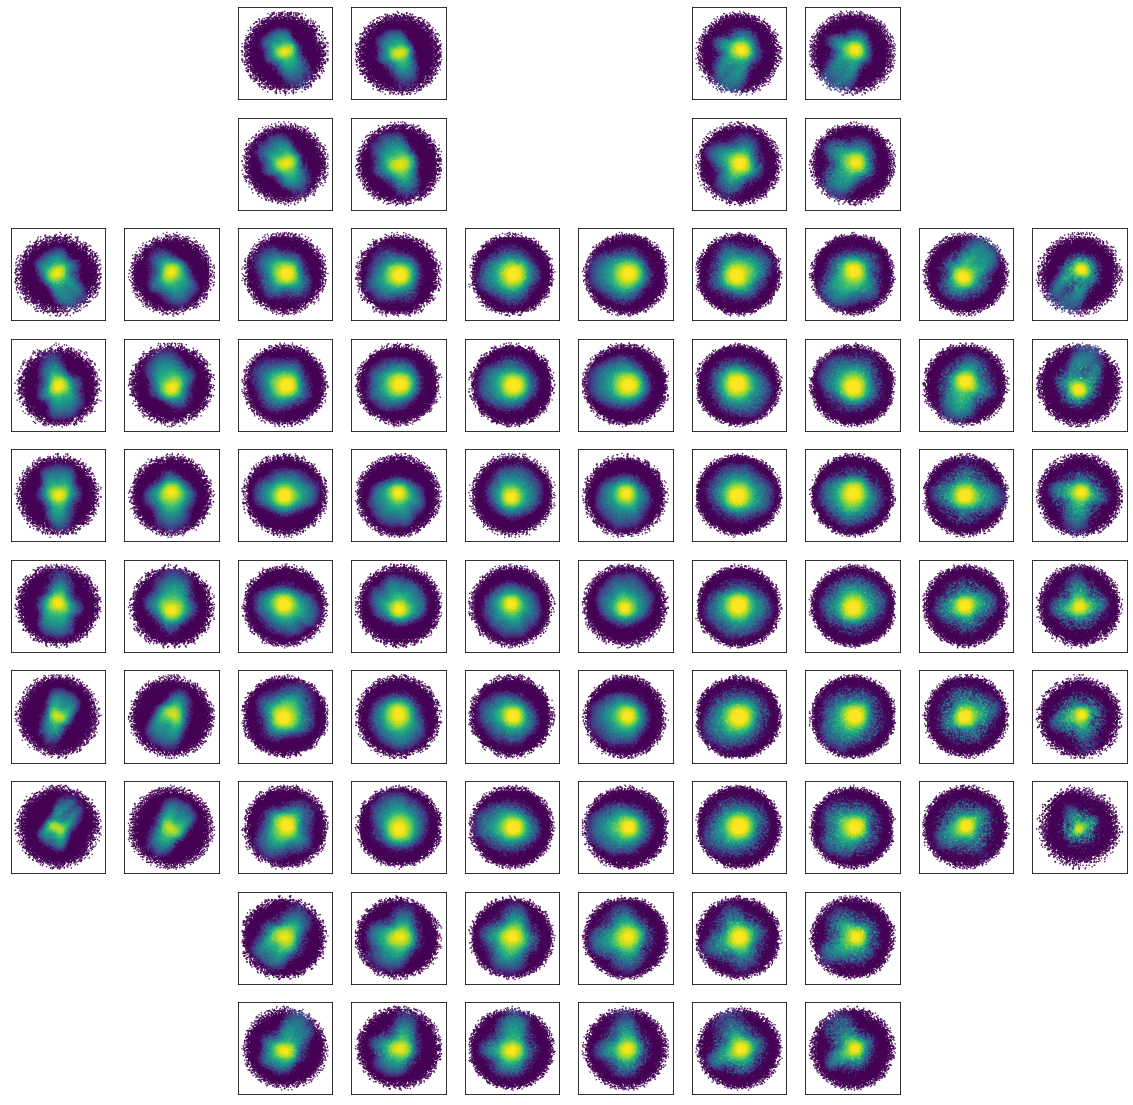

In [12]:
model = False

fig, axis = plt.subplots(5*2,5*2, sharex=False, sharey=False, figsize=(20, 20))

for i, ax in enumerate(axis.ravel()):
    if i not in map2.keys() or i in [4,5,14,15]:
        ax._visible = False
        continue
    if map2[i] not in models.keys():
        continue
        
    if model:
        x = models[map2[i]]["x_model"]
        y = models[map2[i]]["y_model"]
        f = models[map2[i]]["f_model"]
    else:
        x = models[map2[i]]["x_model"]
        y = models[map2[i]]["y_model"]
        f = models[map2[i]]["mean_f"]
        mask = models[map2[i]]["clip_mask"]
        x = x[mask]
        y = y[mask]
        f = f[mask]
    # ax.text(x.min() + 0.5, y.min() + 0.5, map2[i], color="r", fontsize=15)

    ax.scatter(x, y, c=f, marker=".", s=1, vmin=-3, vmax=-0.5)
    
    if maprot[map2[i]] == 'h':
        ax.invert_xaxis()
        
    if maprot[map2[i]] == 'hv':
        ax.invert_xaxis()
        ax.invert_yaxis()
        
    if maprot[map2[i]] == 'v':
        ax.invert_yaxis()

    
for ax in axis.ravel():
    ax.set_yticks([])
    ax.set_xticks([])
    ax.set_facecolor('none')
    
plt.savefig("../figures/ffi/focal_plane_psf_data.png", format="png", bbox_inches="tight")

plt.show()

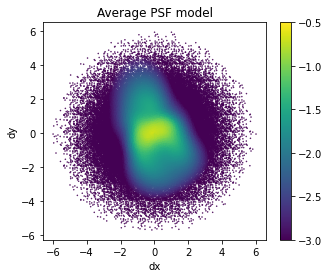

In [18]:
fig, ax = plt.subplots(1, figsize=(5, 4))

x = models[55]["x_model"]
y = models[55]["y_model"]
f = models[55]["f_model"]

cax = ax.scatter(x, y, c=f, marker=".", s=1, vmin=-3, vmax=-0.5)
fig.colorbar(cax, ax=ax)
ax.set_xlabel("dx")
ax.set_ylabel("dy")
ax.set_title("Average PSF model")

plt.show()